# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [8]:
data = pd.read_csv('compresive_strength_concrete.csv')

In [9]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [11]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [12]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [13]:
data.shape

(1030, 9)

# split data

In [59]:
x = (data.iloc[:, 0:8])
y = (data.iloc[:, 8])
from sklearn.model_selection import train_test_split
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.30, random_state=42) 

In [63]:
print(x_train_val.shape)
print(y_train_val.shape)

(721, 8)
(721,)


50% train 20% val split 

In [64]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.285, random_state=42) #0.285*0.7=0.2

In [65]:
x_train.shape

(515, 8)

In [75]:
model= Sequential()
model.add(Dense(10,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

In [76]:
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])

In [77]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_val,y_val))

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 3293.1788 - mae: 51.7526 - val_loss: 395.7114 - val_mae: 16.5462
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 340.1812 - mae: 14.8127 - val_loss: 362.1315 - val_mae: 15.6906
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 307.0721 - mae: 14.1458 - val_loss: 325.5868 - val_mae: 15.0064
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 275.4870 - mae: 13.3331 - val_loss: 318.8085 - val_mae: 14.9397
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 279.4791 - mae: 13.5173 - val_loss: 320.9861 - val_mae: 14.9330
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 245.0896 - mae: 12.6556 - val_loss: 326.6645 - val_mae: 14.4289
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 213.7100 - mae: 11.7412 - val_loss: 287.2712 - val_mae: 14.1257
Epoch 8/100
17/17 [====================

Epoch 61/100
17/17 [==============================] - 0s 3ms/step - loss: 104.1675 - mae: 7.9385 - val_loss: 135.1257 - val_mae: 9.1172
Epoch 62/100
17/17 [==============================] - 0s 4ms/step - loss: 98.8604 - mae: 7.5981 - val_loss: 119.4001 - val_mae: 8.5026
Epoch 63/100
17/17 [==============================] - 0s 3ms/step - loss: 96.6956 - mae: 7.5367 - val_loss: 121.5236 - val_mae: 8.6026
Epoch 64/100
17/17 [==============================] - 0s 3ms/step - loss: 97.4291 - mae: 7.6542 - val_loss: 122.0769 - val_mae: 8.6116
Epoch 65/100
17/17 [==============================] - 0s 3ms/step - loss: 117.6741 - mae: 8.5663 - val_loss: 134.4164 - val_mae: 9.0977
Epoch 66/100
17/17 [==============================] - 0s 3ms/step - loss: 107.5019 - mae: 7.8674 - val_loss: 128.9474 - val_mae: 8.8491
Epoch 67/100
17/17 [==============================] - 0s 3ms/step - loss: 102.6527 - mae: 7.6838 - val_loss: 119.7163 - val_mae: 8.4952
Epoch 68/100
17/17 [==============================]

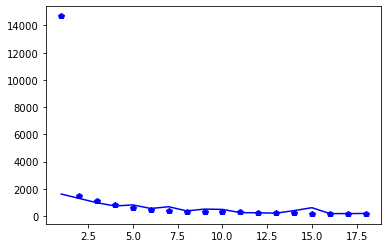

In [87]:
history_dict=history.history
history_dict.keys()
import matplotlib.pyplot as plt
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bp',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')

After 19 epochs model gets overfit (train network again for 18 epochs only)

In [80]:
model= Sequential()
model.add(Dense(10,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
history=model.fit(x_train,y_train,epochs=18,validation_data=(x_val,y_val))

Epoch 1/18
17/17 [==============================] - 1s 11ms/step - loss: 25413.9386 - mae: 147.3357 - val_loss: 1622.0062 - val_mae: 31.0877
Epoch 2/18
17/17 [==============================] - 0s 3ms/step - loss: 1592.9046 - mae: 32.0821 - val_loss: 1300.8170 - val_mae: 28.0470
Epoch 3/18
17/17 [==============================] - 0s 3ms/step - loss: 1262.0300 - mae: 29.0258 - val_loss: 979.9423 - val_mae: 24.7919
Epoch 4/18
17/17 [==============================] - 0s 3ms/step - loss: 857.1002 - mae: 23.0699 - val_loss: 745.1982 - val_mae: 21.8085
Epoch 5/18
17/17 [==============================] - 0s 3ms/step - loss: 635.7855 - mae: 19.8225 - val_loss: 824.2676 - val_mae: 23.3440
Epoch 6/18
17/17 [==============================] - 0s 3ms/step - loss: 561.5419 - mae: 19.1910 - val_loss: 562.1660 - val_mae: 18.5438
Epoch 7/18
17/17 [==============================] - 0s 3ms/step - loss: 418.9013 - mae: 16.5509 - val_loss: 690.9675 - val_mae: 21.7629
Epoch 8/18
17/17 [======================

Model Evalutation

In [82]:
result=model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 776us/step - loss: 178.8327 - mae: 10.4849


In [84]:
predictions=model.predict(x_test)
predictions

array([[41.916508 ],
       [34.976944 ],
       [40.95006  ],
       [34.476547 ],
       [ 7.6897306],
       [29.945679 ],
       [24.194487 ],
       [31.428799 ],
       [23.72515  ],
       [37.737476 ],
       [28.615364 ],
       [23.887465 ],
       [38.526966 ],
       [35.403294 ],
       [22.366804 ],
       [31.795887 ],
       [26.80149  ],
       [26.40349  ],
       [28.67129  ],
       [26.90316  ],
       [32.238316 ],
       [21.757952 ],
       [32.43662  ],
       [24.561249 ],
       [27.868473 ],
       [28.329254 ],
       [22.984476 ],
       [34.022312 ],
       [33.25861  ],
       [24.495129 ],
       [35.455914 ],
       [29.981562 ],
       [39.093227 ],
       [34.662155 ],
       [25.58834  ],
       [30.410158 ],
       [23.685963 ],
       [30.38925  ],
       [20.796757 ],
       [34.555847 ],
       [25.89331  ],
       [17.998411 ],
       [33.2352   ],
       [35.0828   ],
       [23.177874 ],
       [40.878044 ],
       [35.128574 ],
       [37.74

In [85]:
y_test

31     52.91
109    55.90
136    74.50
88     35.30
918    10.54
       ...  
250    24.92
377    36.30
615    32.33
9      39.29
357    66.82
Name: Concrete compressive strength(MPa, megapascals) , Length: 309, dtype: float64